In [1]:
import pickle
import os

file_path = '/tf/hjlee/Att_weights/'

In [2]:
file_list = []

for file in os.listdir(file_path):
    file_list.append(file)

In [3]:
file_list

['Swin-new-15-2023-10-16_weights.pkl',
 'Swin-real-new-15-2023-10-16_weights.pkl',
 'Swin-real-new-15-2023-10-16_preds.pkl',
 'Swin-new-15-2023-10-16_labels.pkl',
 'Swin-real-new-15-2023-10-16_labels.pkl',
 'Swin-origin-15-2023-10-16_labels.pkl',
 'Swin-origin-15-2023-10-16_weights.pkl',
 'Swin-new-15-2023-10-16_preds.pkl',
 'Swin-origin-15-2023-10-16_preds.pkl']

## 1. Labels

In [14]:
pk = os.path.join(file_path, 'Swin-real-new-15-2023-10-16_labels.pkl')
with open(pk, 'rb') as file:
    labels = pickle.load(file)
    
print(labels[:15])
print(len(labels))

[0, 0, 0, 0, 2, 2, 2, 1, 2, 3, 0, 0, 0, 0, 2]
584160


## 2. Preds

In [13]:
pk = os.path.join(file_path, 'Swin-real-new-15-2023-10-16_preds.pkl')
with open(pk, 'rb') as file:
    preds = pickle.load(file)
    
print(preds[:15])
print(len(preds))

[0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1]
584160


## 3. Weights

In [94]:
pk = os.path.join(file_path, 'Swin-real-new-15-2023-10-16_weights.pkl')
with open(pk, 'rb') as file:
    weights = pickle.load(file)
    
print(len(weights))

3895


In [86]:
weights[0].shape

(10, 15, 15)

In [87]:
weights[0][0]

array([[0.17146155, 0.18339425, 0.03337251, 0.07589248, 0.05832757,
        0.03842201, 0.09107094, 0.04987125, 0.04118343, 0.03674496,
        0.03075727, 0.08058213, 0.03175066, 0.04707325, 0.03009573],
       [0.24603885, 0.08498843, 0.10026477, 0.07650528, 0.02876889,
        0.03367047, 0.06733487, 0.0496658 , 0.05432085, 0.03970519,
        0.04938405, 0.06478061, 0.02549802, 0.04784923, 0.03122468],
       [0.08564531, 0.2100952 , 0.03208837, 0.07790985, 0.03709354,
        0.0835295 , 0.15991995, 0.02952687, 0.06279311, 0.03921314,
        0.06181321, 0.02908613, 0.02202164, 0.04893547, 0.0203287 ],
       [0.13408801, 0.11920014, 0.16272786, 0.06309464, 0.04598733,
        0.03788043, 0.08530031, 0.05102087, 0.04326795, 0.0254828 ,
        0.03670901, 0.08239698, 0.03361735, 0.04463586, 0.03459041],
       [0.09983423, 0.12742049, 0.10767807, 0.08910103, 0.02750254,
        0.07418774, 0.06463455, 0.03940631, 0.08220393, 0.03424749,
        0.03563282, 0.11020992, 0.02710074, 

# Visualization

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler

In [49]:
labels_map = {0:'Wake', 1:'N1', 2:'N2', 3:'N3', 4:'REM'}

In [52]:
for i in range(len(labels)):
    labels[i] = labels_map[labels[i]]

In [53]:
labels[:15]

['Wake',
 'Wake',
 'Wake',
 'Wake',
 'N2',
 'N2',
 'N2',
 'N1',
 'N2',
 'N3',
 'Wake',
 'Wake',
 'Wake',
 'Wake',
 'N2']

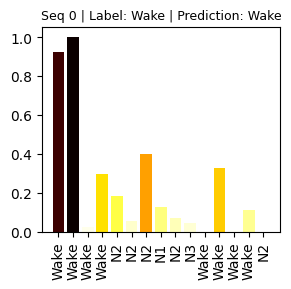

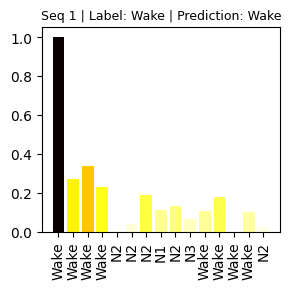

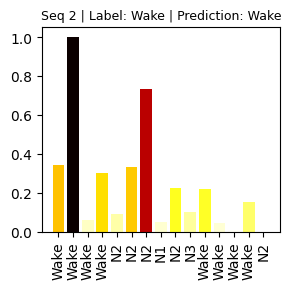

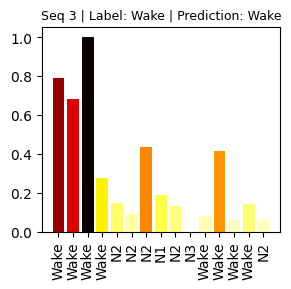

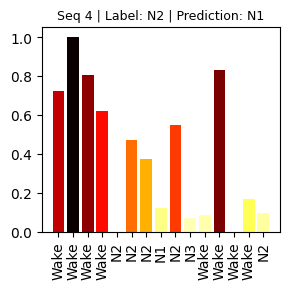

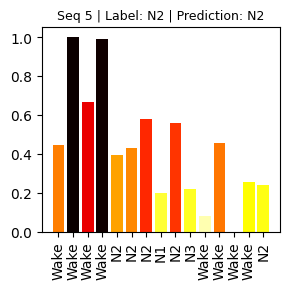

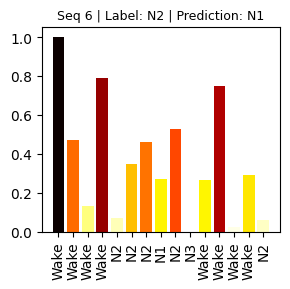

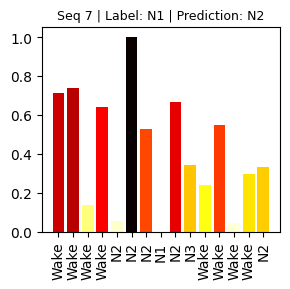

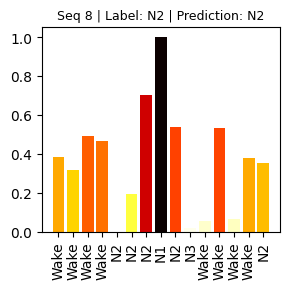

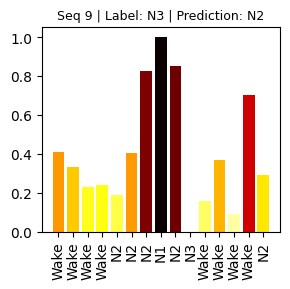

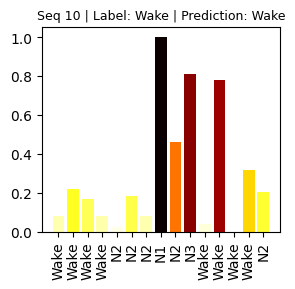

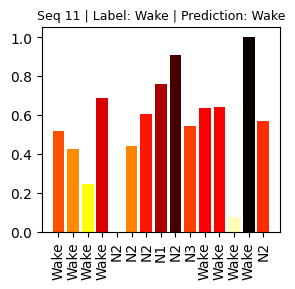

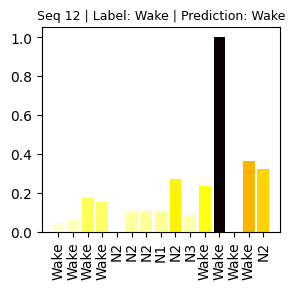

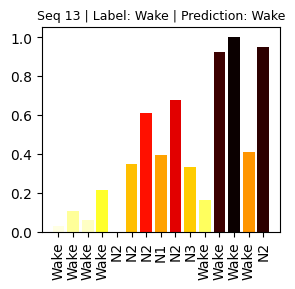

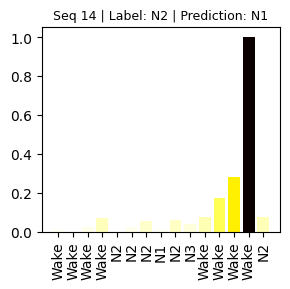

In [61]:
# Loop through the sequences
attention_weights = weights[0][0]

cmap = plt.cm.get_cmap('hot_r')

# Normalize the attention values
scaler = MinMaxScaler()

# Loop through the sequences
for sequence_idx, attention_weights_sequence in enumerate(attention_weights):
    plt.figure(figsize=(3, 3))
    
    reshaped = attention_weights_sequence.reshape(-1, 1)
    #print(reshaped)
    normalized_weights = scaler.fit_transform(reshaped)
    #print(normalized_weights)
    attention_weights_seq_norm = normalized_weights.flatten()
    
    # Create a bar chart for the averaged attention weights
    plt.bar(range(15), attention_weights_seq_norm, color=cmap(attention_weights_seq_norm))
    plt.xticks(range(15), labels[:15], rotation=90)
    plt.title(f'Seq {sequence_idx} | Label: {labels[sequence_idx]} | Prediction: {labels_map[preds[sequence_idx]]}', fontsize = 9)

    # Adjust subplot layout and display the chart
    plt.tight_layout()
    plt.show()

# Make a function

### Group label and pred by 15

In [64]:
len(labels)

584160

In [65]:
len(preds)

584160

In [66]:
def split_list(lst, chunk_size):
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

In [67]:
chunk_size = 15
split_labels = list(split_list(labels, chunk_size))

In [71]:
len(split_labels)

38944

In [99]:
split_labels

[['Wake',
  'Wake',
  'Wake',
  'Wake',
  'N2',
  'N2',
  'N2',
  'N1',
  'N2',
  'N3',
  'Wake',
  'Wake',
  'Wake',
  'Wake',
  'N2'],
 ['N2',
  'N2',
  'N2',
  'N3',
  'N3',
  'Wake',
  'Wake',
  'Wake',
  'Wake',
  'N2',
  'Wake',
  'N2',
  'Wake',
  'N3',
  'N3'],
 ['Wake',
  'Wake',
  'Wake',
  'Wake',
  'N1',
  'N1',
  'N1',
  'N1',
  'N3',
  'N3',
  'Wake',
  'Wake',
  'Wake',
  'Wake',
  'N2'],
 ['N1',
  'N1',
  'N1',
  'N3',
  'N3',
  'Wake',
  'Wake',
  'Wake',
  'Wake',
  'N2',
  'N2',
  'N2',
  'N2',
  'N3',
  'N3'],
 ['Wake',
  'Wake',
  'Wake',
  'N1',
  'Wake',
  'N2',
  'N2',
  'N2',
  'N3',
  'N3',
  'Wake',
  'Wake',
  'Wake',
  'N1',
  'N1'],
 ['Wake',
  'N1',
  'N1',
  'N3',
  'N3',
  'Wake',
  'Wake',
  'Wake',
  'N1',
  'N1',
  'Wake',
  'N2',
  'N1',
  'N3',
  'N3'],
 ['Wake',
  'Wake',
  'Wake',
  'Wake',
  'N1',
  'Wake',
  'N2',
  'N2',
  'N3',
  'N3',
  'Wake',
  'Wake',
  'Wake',
  'N1',
  'N1'],
 ['Wake',
  'N2',
  'N2',
  'N3',
  'N3',
  'Wake',
  'Wake',

In [72]:
split_preds = list(split_list(preds, chunk_size))

In [73]:
len(split_preds)

38944

In [118]:
# Loop through the sequences
# attention_weights = weights[0][0]

def inter_epoch_interpretability(i, attention_weights):
    cmap = plt.cm.get_cmap('hot_r')

    # Normalize the attention values
    scaler = MinMaxScaler()

    # Loop through the sequences
    for sequence_idx, attention_weights_sequence in enumerate(attention_weights):
        plt.figure(figsize=(3, 3))

        reshaped = attention_weights_sequence.reshape(-1, 1)
        #print(reshaped)
        normalized_weights = scaler.fit_transform(reshaped)
        #print(normalized_weights)
        attention_weights_seq_norm = normalized_weights.flatten()

        # Create a bar chart for the averaged attention weights
        plt.bar(range(15), attention_weights_seq_norm, color=cmap(attention_weights_seq_norm))
        plt.xticks(range(15), split_labels[i], rotation=90)
        plt.title(f'Seq {sequence_idx+1} | Label: {split_labels[i][sequence_idx]} | Prediction: {labels_map[split_preds[i][sequence_idx]]}', fontsize = 9)

        # Adjust subplot layout and display the chart
        plt.tight_layout()
        plt.show()

In [113]:
pk = os.path.join(file_path, 'Swin-real-new-15-2023-10-16_weights.pkl')
with open(pk, 'rb') as file:
    weights = pickle.load(file)
    
print(len(weights))

3895


In [114]:
flattened_list = [arr for sublist in weights for arr in sublist]

In [115]:
len(flattened_list)

38944

In [116]:
flattened_list[0].shape

(15, 15)

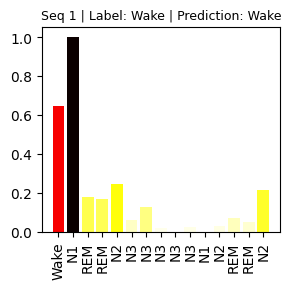

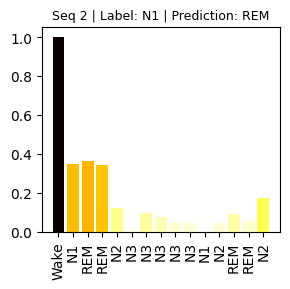

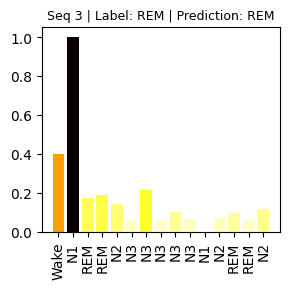

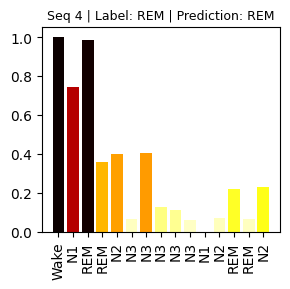

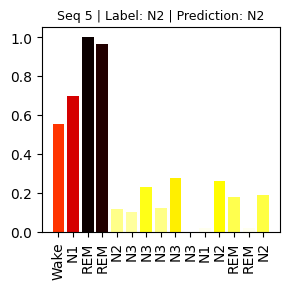

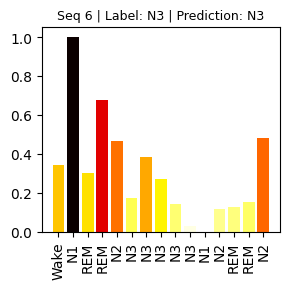

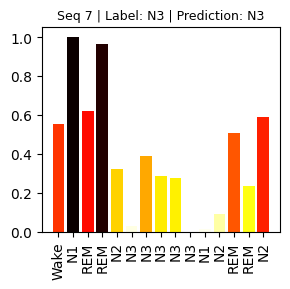

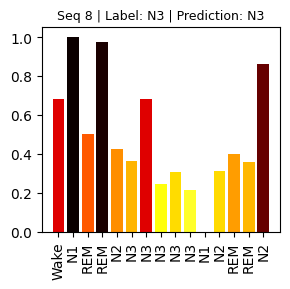

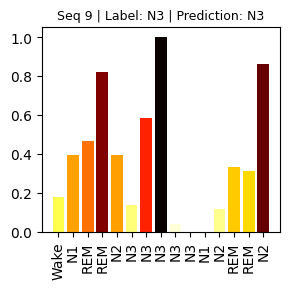

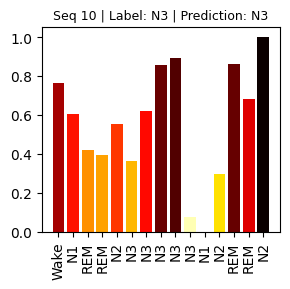

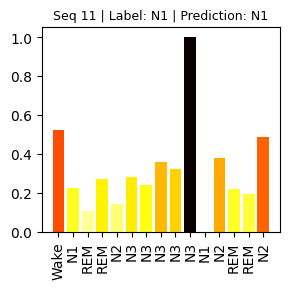

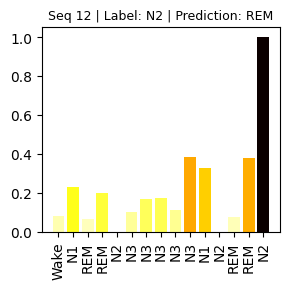

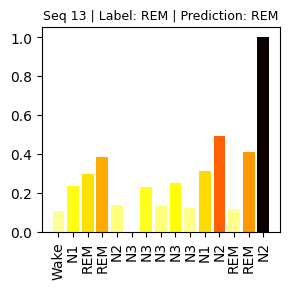

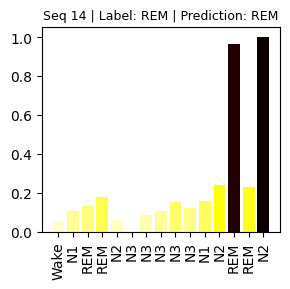

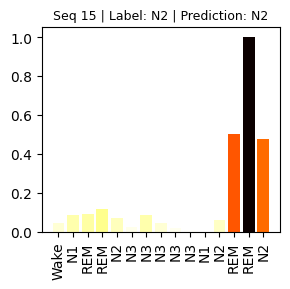

In [120]:
inter_epoch_interpretability(12, flattened_list[12])